# Lab 3.1: Atmosphere & GHG


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from oscar import OSCAR

%matplotlib inline

<div class="alert alert-info"><h1>Exercise 1: Radiative Forcing and Warming Efficiency</h1></div>

<ol start="1">
    <li>Run the model using the emissions scenario `'RCP8.5'` for all constituents through year 2010.</li>
</ol>

In [3]:
enddate = 2010
results = OSCAR(scen_ALL='RCP8.5').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="2">
    <li>Plot the temporal evolution of the emissions of CO2 (EFF), CH4 (ECH4), N2O (EN2O) and Halocarbon (Ehalo = EHFC + EPFC + EODS). Note that CO2 emissions are in Gt/y, CH4 and N2O emissions are in Mt/y, Halocarbon emissions are in kt/y  (see [online documentation](http://www.princeton.edu/~skclark/oscar/outputs.html#emissions)). Discuss the changes in Hlocarbons at the end of the 20th century.</li>
</ol>

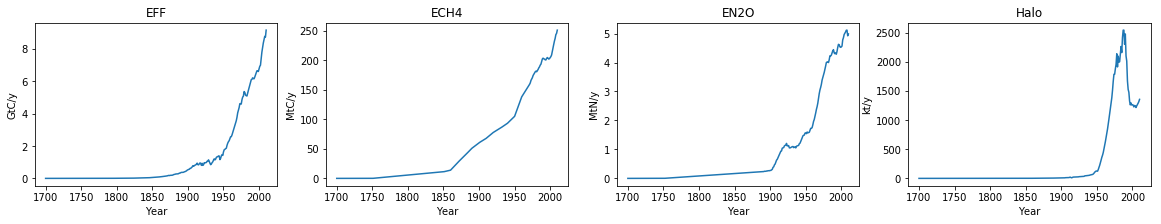

In [4]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(20, 3)
year = 1700 + np.arange(len(results['EFF']['Total'])) # give info on time output of model
units=['GtC/y','MtC/y','MtN/y','kt/y']

GHG = ['EFF', 'ECH4', 'EN2O']


for i, comp in enumerate(GHG):
    toto = results[comp]['Total']
    axes[i].plot(year, toto)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(units[i])
    axes[i].set_title(comp)

EHALO = results['EHFC']['Total']+results['EODS']['Total']+results['EPFC']['Total']
axes[3].plot(year, EHALO)
axes[3].set_xlabel('Year')
axes[3].set_ylabel('kt/y')
axes[3].set_title('Halo')


<ol start="3">
    <li>Plot the radiative forcing time-series for these four compounds. What is the radiative forcing of each compound in 2010?</li>
</ol>

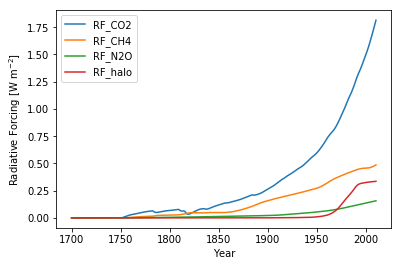

In [6]:
fig, ax = plt.subplots(1, 1)
year = 1700 + np.arange(len(results['RF_CO2']))
forcing_variables = ['RF_CO2', 'RF_CH4', 'RF_N2O', 'RF_halo']

for rf in forcing_variables:
    ax.plot(year, results[rf], label=rf)
ax.set_ylabel('Radiative Forcing [W m$^{-2}$]')
ax.set_xlabel('Year')
ax.legend(loc='upper left')

<ol start="4">
    <li>Compute the radiative forcing in 2010 relative to the amount of gas emitted over the period 1700 to 2010 for each of the four compounds (in W/m2/Gt). Note: You need to sum the emissions over all years between 1700 and 2010 and to convert all emissions to Gt of compound. For CO2: 1 GtC = 44/12 Gt CO2; for CH4: 1 Mt C = 16/12 x 1e-3 Gt CH4; for N2O: 1 MtN = 44/14 x 1e-3 Gt N2O and for Halocarbons: 1 kt Halo = 1e-6 Gt halo. </li>
</ol>

In [16]:
conversion_factors = [44 / 12., 16 / 12. * 1e-3, 44 / 15. * 1e-3, 1e-6]
emission_variables = ['EFF', 'ECH4', 'EN2O']

for factor,rf,comp in zip(conversion_factors, forcing_variables, emission_variables):
    total_emissions = np.sum(results[comp]['Total']) * factor
    print '{} normalized: {:0.04f} W m^-2 Gt^-1'.format(rf, results[rf][-1] / total_emissions)
    
results['RF_halo']
print 'RF_halo normalized: {:0.4f} W m^-2 Gt^-1'.format(results['RF_halo'][-1] / np.sum(EHALO) / conversion_factors[3])

# Note here we do not compute the GWP, 
# which would require a pulse of 1 Mg of each compound and similar history for all of them

RF_CO2 normalized: 0.0014 W m^-2 Gt^-1
RF_CH4 normalized: 0.0215 W m^-2 Gt^-1
RF_N2O normalized: 0.1893 W m^-2 Gt^-1
RF_halo normalized: 4.0541 W m^-2 Gt^-1


In [6]:
import numpy as np
np.array([1., 1.]) * 2/3

array([ 0.66666667,  0.66666667])

-----

Running with custom emissions
================

To conduct unique experiments, it is useful to be able to customize emissions.  In the following exercise we will do so.  For documentation and examples of doing this, see: http://www.princeton.edu/~skclark/oscar/custom_scens.html

<div class="alert alert-info"><h1>Exercise 2: Vegetarian planet</h1></div>

1. Start by making a run of the model using the business as usual RCP8.5 scenario through year 2100.  This will serve as a reference.

In [3]:
enddate=2100
rcp85 = OSCAR(scen_ALL='RCP8.5').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="2">
    <li>Knowing that ~1/3 of methane anthropogenic emissions come from ruminants, design an experiment to estimate the impact of turning the humans vegetarian (essentially scale the RCP8.5 scenario's emissions by 2/3). Note: you can only modify emissions from 2000 (index 300) onwards.  Use the configuration parameter `mod_DATAscen='raw'` and specify emissions for all constituents which allow custom emissions (see the [documentation](http://www.princeton.edu/~skclark/oscar/custom_scens.html) for a list of those).</li>
</ol>

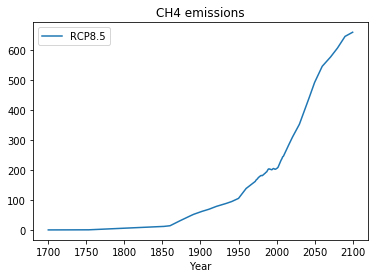

In [4]:
# 2. Design Ch4 emissions
CH4 = rcp85['ECH4']['Total'][300:]

fig, ax = plt.subplots(1, 1)
year = 1700 + np.arange(enddate - 1700 + 1)
ax.plot(year, rcp85['ECH4']['Total'], label='RCP8.5')

ax.set_title('CH4 emissions')
ax.set_xlabel('Year')
ax.legend(loc='upper left')

In [5]:
rcp85_veg = OSCAR(scen_ECH4=2. / 3.* CH4, scen_EFF='RCP8.5', 
                  scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
                  scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
                  scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
                  scen_RFnat='RCP8.5', scen_LULCC='RCP8.5', 
                  mod_DATAscen='raw').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="3">
    <li>Plot CH4 emissions and atmospheric concentrations in both cases.</li>
    <li>Compare the temperature in the 2 simulations. What is the temperature difference in 2100?</li>
</ol>

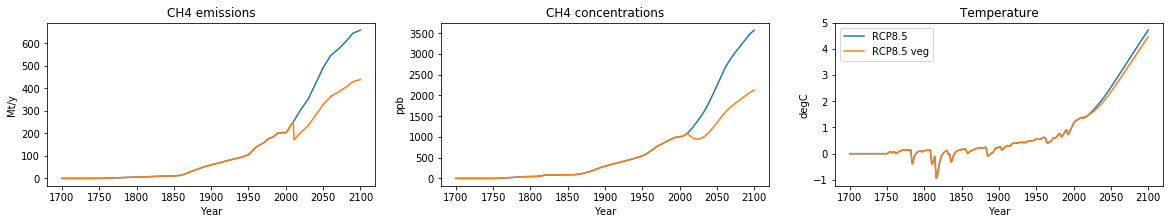

In [6]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 3)

year = 1700 + np.arange(enddate - 1700 + 1)
axes[0].plot(year, rcp85['ECH4']['Total'], label='RCP8.5') 
axes[0].plot(year, rcp85_veg['ECH4']['Total'], label='RCP8.5 veg') 

axes[0].set_title('CH4 emissions')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mt/y')

axes[1].plot(year, rcp85['D_CH4'], label='RCP8.5') 
axes[1].plot(year, rcp85_veg['D_CH4'], label='RCP8.5 veg') 

axes[1].set_title('CH4 concentrations')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('ppb')


axes[2].plot(year, rcp85['D_gst'], label='RCP8.5') 
axes[2].plot(year, rcp85_veg['D_gst'], label='RCP8.5 veg') 

axes[2].set_title('Temperature')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('degC')
axes[2].legend(loc='upper left')

In [7]:
rcp85['D_gst'][2100-1700] - rcp85_veg['D_gst'][2100-1700] 

0.25687933

Discussion
----------

- Source Data: Global Carbon Project and Global Methane Project: http://www.globalcarbonproject.org/methanebudget/16/data.htm
- Further reading: Herrero, M., Henderson, B., Havlík, P., Thornton, P.K., Conant, R.T., Smith, P., Wirsenius, S., Hristov, A.N., Gerber, P., Gill, M., Butterbach-Bahl, K., Valin, H., Garnett, T., Stehfest, E., 2016. Greenhouse gas mitigation potentials in the livestock sector. Nature Clim. Change 6, 452–461. doi:10.1038/nclimate2925